## Khai báo các thư viện cần dùng

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE  # Phương pháp giảm chiều thứ 2 thay LDA (vì regression)
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.impute import SimpleImputer

# Phần I. TIỀN XỬ LÝ DỮ LIỆU

In [22]:
# Đọc dữ liệu từ file CSV
file_path = '../data/Life Expectancy Data.csv'  
df = pd.read_csv(file_path)

df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Ý nghĩa của các thuộc tính trong dữ liệu:
1. Country: Tên quốc gia.
2. Year: Năm thu thập dữ liệu.
3. Status: Trạng thái phát triển (Developed/Developing).
4. Life expectancy: Tuổi thọ trung bình (đầu ra - target).
5. Adult Mortality: Tỷ lệ tử vong ở người lớn.
6. Infant deaths: Số trẻ sơ sinh tử vong trên 1000 dân.
7. Alcohol: Tiêu thụ rượu bình quân đầu người.
8. Percentage expenditure: Chi tiêu y tế chiếm phần trăm GDP.
9. Hepatitis B: Tỷ lệ tiêm chủng viêm gan B.
10. Measles: Số ca sởi trên 1000 dân.
11. BMI: Chỉ số khối cơ thể trung bình.
12. Under-five deaths: Số trẻ dưới 5 tuổi tử vong trên 1000 dân.
13. Polio: Tỷ lệ tiêm chủng bại liệt.
14. Total expenditure: Tổng chi tiêu y tế chiếm phần trăm GDP.
15. Diphtheria: Tỷ lệ tiêm chủng bạch hầu.
16. HIV/AIDS: Số ca tử vong do HIV/AIDS trên 1000 dân.
17. GDP: GDP bình quân đầu người.
18. Population: Dân số quốc gia.
19. Thinness 1-19 years: Tỷ lệ gầy ở trẻ 1-19 tuổi.
20. Thinness 5-9 years: Tỷ lệ gầy ở trẻ 5-9 tuổi.
21. Income composition of resources: Chỉ số phân bổ thu nhập.
22. Schooling: Số năm học trung bình.

Các thuộc tính này dùng để dự đoán tuổi thọ trung bình dựa trên yếu tố y tế - xã hội.



##### Hiển thị kích thước của bảng dữ liệu

In [23]:
df.shape

(2938, 22)

Hiển thị thông tin tóm tắt về DataFrame df. Cụ thể cung cấp các thông tin sau:
- Số hàng và số cột của df
- Tên cột và loại dữ liệu tương ứng của từng cột
- Số lượng giá trị không bị thiếu của từng cột
- Tổng dung lượng bộ nhớ mà df sử dụng

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Lệnh df.isna().sum() trong pandas được sử dụng để kiểm tra số lượng giá trị bị thiếu (NaN - Not a Number) trong mỗi cột của DataFrame df. Cụ thể:
df.isna(): Trả về một DataFrame với các giá trị boolean, trong đó True chỉ ra giá trị bị thiếu (NaN) và False chỉ ra giá trị không bị thiếu.
sum(): Tổng hợp số lượng giá trị True (giá trị bị thiếu) trong mỗi cột. Kết quả là một danh sách cho biết số lượng giá trị thiếu trong từng cột của DataFrame.

In [25]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

Lệnh df['Status'].value_counts() trong pandas được sử dụng để đếm số lượng các giá trị khác nhau trong cột Status của DataFrame df (categorical feature quan trọng).
Cụ thể, cột Status chứa các giá trị như 'Developing' và 'Developed', lệnh này sẽ trả về số lượng các mẫu tương ứng cho mỗi loại. Kết quả sẽ là một bảng liệt kê số lượng các giá trị xuất hiện trong cột, giúp bạn hiểu rõ sự phân bố.

In [26]:
print(df['Status'].value_counts())
# Tính tỉ lệ phần trăm
df['Status'].value_counts(True)

Status
Developing    2426
Developed      512
Name: count, dtype: int64


Status
Developing    0.825732
Developed     0.174268
Name: proportion, dtype: float64

Sử dụng OneHot Encoding để mã hóa các biến phân loại (Country và Status). Vì regression, không cần map target như mẫu (target đã numeric).

In [27]:
# Mã hóa cột 'Status' và 'Country' (one-hot, drop_first để tránh multicollinearity)
df = pd.get_dummies(df, columns=['Country', 'Status'], drop_first=True)

Giải thích: Chuyển categorical sang numeric. 'Country' có nhiều unique (~193), tạo nhiều columns, nhưng giữ để phân tích (có thể drop nếu over-dimensional sau). Tương tự mẫu map diagnosis, nhưng dùng dummies cho multi-category.

Lệnh sns.catplot(x='Status_Developing', data=df, kind='count') sử dụng thư viện Seaborn để tạo biểu đồ cột (count plot) hiển thị số lượng các giá trị khác nhau trong cột Status_Developing (sau encoding) của DataFrame df.
Biểu đồ này giúp trực quan hóa sự phân bố các nhãn Developed và Developing.
Seaborn là một thư viện trực quan hóa dữ liệu được xây dựng trên Matplotlib, cung cấp giao diện dễ sử dụng cho việc tạo các biểu đồ thống kê. Các tính năng chính của Seaborn bao gồm:
- Biểu đồ phân bố (distribution plots): như distplot, kdeplot để hiển thị phân phối của dữ liệu.
- Biểu đồ quan hệ (relational plots): như scatterplot, lineplot để biểu diễn mối quan hệ giữa các biến.
- Biểu đồ phân loại (categorical plots): như barplot, boxplot, catplot để so sánh giữa các nhóm.
Hỗ trợ quản lý màu sắc và các bảng màu để hiển thị dễ hiểu hơn.

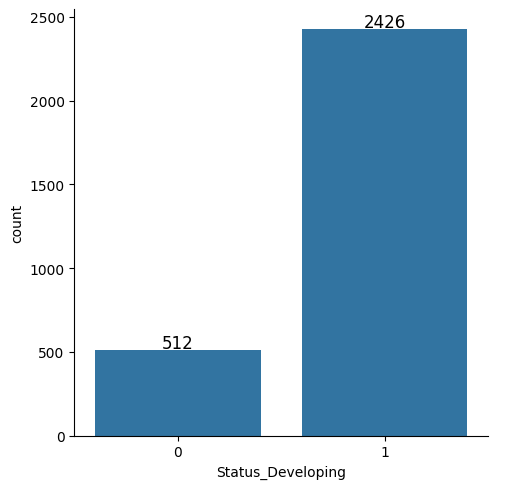

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Tạo catplot cho 'Status_Developing' (0: Developed, 1: Developing)
g = sns.catplot(x='Status_Developing', data=df, kind='count')

# Lấy trục (axis) của biểu đồ để thêm nhãn
ax = g.ax

# Chuyển đổi nhãn trên trục x sang dạng số nguyên
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))  # Chuyển số thực thành số nguyên

# Chèn số lượng vào cột
for i, p in enumerate(ax.patches):
    count = int(p.get_height())  # Chuyển đổi số lượng thành số nguyên
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Vị trí nhãn
                ha='center', va='center',  # Căn chỉnh nhãn
                fontsize=12, color='black',  # Cài đặt phông chữ và màu sắc
                xytext=(0, 5), textcoords='offset points')  # Khoảng cách nhãn

# Hiển thị biểu đồ
plt.show()

Xử lý missing values: Impute mean cho numeric, mode cho categorical (nhưng sau dummies, tất cả numeric trừ target)

In [ ]:
# Xử lý missing values: Impute numeric bằng mean
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('Life expectancy ')  # Trừ target
imputer_num = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])

# Impute target nếu có missing (mean)
df['Life expectancy '] = SimpleImputer(strategy='mean').fit_transform(df[['Life expectancy ']])

In dữ liệu sau khi làm sạch

In [ ]:
df.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developing
0,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,...,False,False,False,False,False,False,False,False,False,True
1,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,...,False,False,False,False,False,False,False,False,False,True
2,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,...,False,False,False,False,False,False,False,False,False,True
3,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,...,False,False,False,False,False,False,False,False,False,True
4,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,...,False,False,False,False,False,False,False,False,False,True


# PHẦN 2: PHÂN TÍCH VÀ TRỰC QUAN HÓA DỮ LIỆU

## 1. Tách đầu vào và đầu ra

- Loại bỏ Life expectancy khỏi df
- axit = 1 --> xóa cột
- Phần còn lại của df <-- X: các biến đầu vào để dự đoán đầu ra y là Life expectancy

In [ ]:
# Tách đầu vào và đầu ra
X = df.drop(['Life expectancy '], axis=1)  # Loại bỏ target
y = df['Life expectancy ']

Chia dữ liệu thành tập huấn luyện (training set) và tập kiểm tra (test set)
train_test_split: Đây là hàm từ thư viện scikit-learn, được sử dụng để chia tập dữ liệu thành hai phần: tập huấn luyện và tập kiểm tra.
test_size=0.3: 30% test, 70% train.
random_state=42: Đảm bảo tái lập.
Không cần stratify=y vì regression (y numeric, không categorical như mẫu).

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

## 2. Phân tích thành phần chính PCA

### a. Chuẩn hóa dữ liệu

Đoạn mã này sử dụng StandardScaler từ thư viện scikit-learn để chuẩn hóa dữ liệu. Việc chuẩn hóa là một bước rất quan trọng trong quy trình học máy, đặc biệt là đối với các mô hình nhạy cảm với sự khác biệt về đơn vị đo của các đặc trưng (như SVM, KNN, Logistic Regression,...).

StandardScaler: Đây là một công cụ trong scikit-learn dùng để chuẩn hóa các đặc trưng của dữ liệu bằng cách tạo ra dữ liệu có phân phối chuẩn (normal distribution) với:

Mean (trung bình) = 0.
Standard Deviation (độ lệch chuẩn) = 1.
Công thức chuẩn hóa

Xét lần lượt từng cột thuộc tính, với mỗi giá trị ( x ) thì ta chuẩn hóa thành x_scaled như sau:

x_scaled = (x - μ) / σ

Trong đó:

( x ) là giá trị của dữ liệu.
( N ) là số mẫu dữ liệu, ở đây cụ thể bằng 569.
( mu ) là giá trị trung bình của đặc trưng, được tính như sau:
                    μ = (x1 + x2 + x3 + ... +xN)/N

( sigma ) là độ lệch chuẩn của đặc trưng, được tính như sau:
                    \sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}


In [ ]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Thực hiện giảm chiều bằng PCA
pca = PCA()

- PCA(): Đây là cách khởi tạo một đối tượng của lớp PCA từ thư viện scikit-learn.
- Khi khởi tạo PCA mà không truyền thêm tham số, PCA sẽ giữ lại tất cả các thành phần chính của dữ liệu.

fit_transform(): Đây là một phương thức kết hợp hai bước trong quá trình PCA:

- fit(): Phương thức này học các thành phần chính từ bộ dữ liệu huấn luyện (X_train_scaled). Nó sẽ tính toán ma trận hiệp phương sai của dữ liệu và tìm các thành phần chính.
- transform(): Sau khi đã "học" xong các thành phần chính, phương thức transform() sẽ chiếu dữ liệu gốc vào không gian mới được tạo ra bởi các thành phần chính.

In [ ]:
# Thực hiện PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

### Phân tích phương sai giải thích
pca.explained_variance_ratio_:

- Đây là thuộc tính của đối tượng PCA sau khi đã thực hiện fit() trên dữ liệu. Nó trả về tỷ lệ phương sai giải thích của mỗi thành phần chính.
- Phương sai giải thích cho biết mức độ quan trọng của mỗi thành phần chính trong việc giải thích sự biến thiên trong dữ liệu.

Kết quả explained_variance là một mảng chứa tỷ lệ phương sai giải thích của từng thành phần chính.

np.cumsum(): Đây là hàm trong thư viện NumPy tính tổng dồn của một mảng. Cộng dồn các giá trị của explained_variance để tính tổng phương sai giải thích của tất cả các thành phần chính đến một thành phần chính cụ thể.

cumulative_variance: Kết quả là một mảng chứa tổng phương sai giải thích tích lũy của các thành phần chính.

In [ ]:
# Phân tích phương sai giải thích
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

### Vẽ biểu đồ phương sai giải thích PCA.

Biểu đồ này sẽ giúp bạn hiểu được mức độ đóng góp của các thành phần chính trong PCA vào phương sai tổng thể, với một ngưỡng được chỉ ra để xác định số lượng thành phần chính cần thiết để giải thích ít nhất 95% phương sai của dữ liệu.

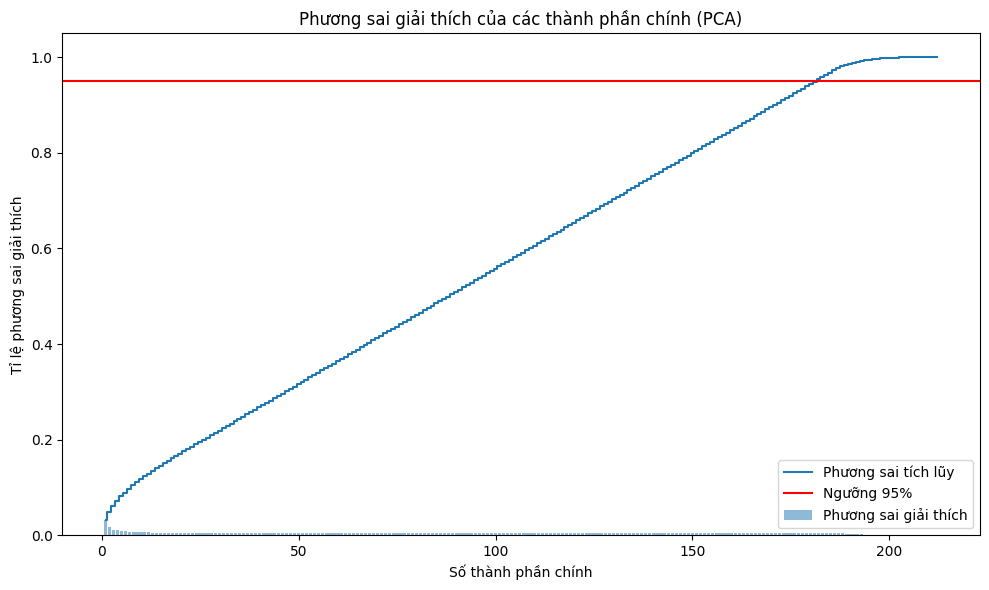

In [ ]:
# Vẽ đồ thị phương sai giải thích
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center',
        label='Phương sai giải thích')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Phương sai tích lũy')
plt.axhline(y=0.95, color='r', linestyle='-', label='Ngưỡng 95%')
plt.xlabel('Số thành phần chính')
plt.ylabel('Tỉ lệ phương sai giải thích')
plt.title('Phương sai giải thích của các thành phần chính (PCA)')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('../results/figures/pca_explained_variance.png')

### Xác định số thành phần chính cần để giữ 95% phương sai

cumulative_variance >= 0.95:

- cumulative_variance là mảng chứa phương sai tích lũy của các thành phần chính (được tính bằng cách cộng dồn explained_variance).
- Câu lệnh này kiểm tra điều kiện, trả về một mảng boolean (True/False), nơi mỗi giá trị tương ứng với việc liệu phương sai tích lũy ở đó có lớn hơn hoặc bằng 95% hay không.

np.argmax()

- np.argmax() trả về chỉ số (index) của phần tử đầu tiên có giá trị True trong mảng boolean được tạo ra từ điều kiện cumulative_variance >= 0.95.
- Cộng 1 do np.argmax() trả về chỉ số bắt đầu từ 0, nhưng trong PCA, số thành phần chính bắt đầu từ 1

In [ ]:
# Xác định số thành phần chính cần để giữ 95% phương sai
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Số thành phần chính cần để giữ 95% phương sai: {n_components_95}")

Số thành phần chính cần để giữ 95% phương sai: 182


In [ ]:
# Áp dụng PCA với số thành phần được chọn
pca_95 = PCA(n_components=n_components_95)
X_train_pca_95 = pca_95.fit_transform(X_train_scaled)
X_test_pca_95 = pca_95.transform(X_test_scaled)

### Trực quan hóa dữ liệu PCA

Trực quan hóa dữ liệu sau khi áp dụng PCA bằng cách vẽ biểu đồ phân tán cho hai thành phần chính đầu tiên. Việc này giúp hình dung sự phân bố và mối quan hệ giữa các mẫu dữ liệu trong không gian giảm chiều.

Màu sắc của các điểm dựa trên target y_train (numeric, dùng palette continuous) giúp ta thấy rõ sự gradient theo tuổi thọ.

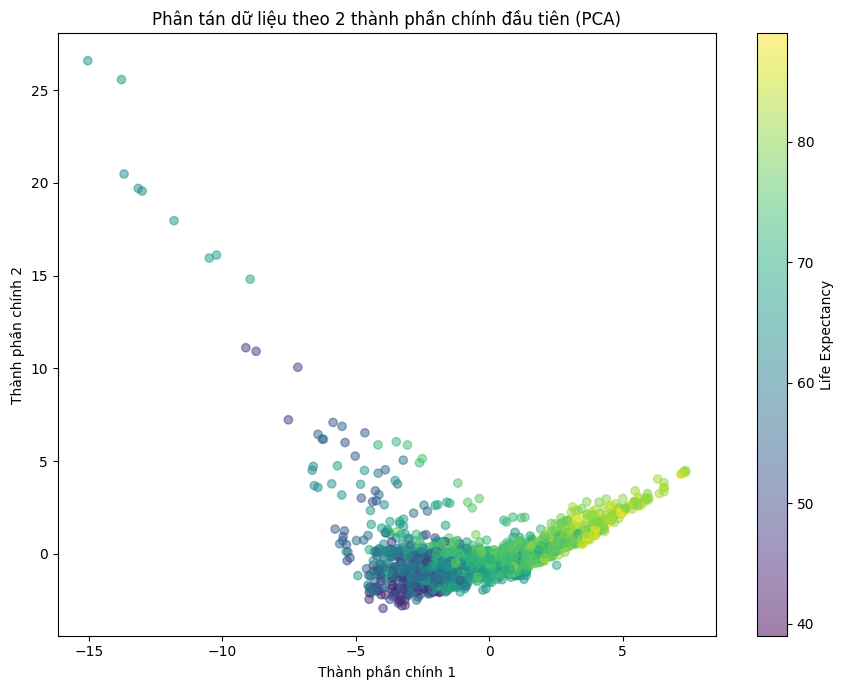

In [ ]:
# Trực quan hóa dữ liệu PCA
# Vẽ biểu đồ phân tán cho 2 thành phần chính đầu tiên
plt.figure(figsize=(9, 7))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Life Expectancy')
plt.xlabel('Thành phần chính 1')
plt.ylabel('Thành phần chính 2')
plt.title('Phân tán dữ liệu theo 2 thành phần chính đầu tiên (PCA)')
plt.tight_layout()
plt.savefig('../results/figures/pca_scatter_plot.png')

## 3. Phân tích giảm chiều thứ 2: t-SNE

t-SNE: Phương pháp non-linear, tốt cho visualize clusters. n_components=2 cho 2D plot.

In [ ]:
# Thực hiện t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)  # Fit riêng nếu cần, nhưng thường fit on train

### Trực quan hóa dữ liệu t-SNE

Vẽ đồ thị phân tán cho dữ liệu đã được giảm chiều bằng t-SNE. Các điểm dữ liệu được tô màu theo target (Life expectancy) để thể hiện sự phân biệt.

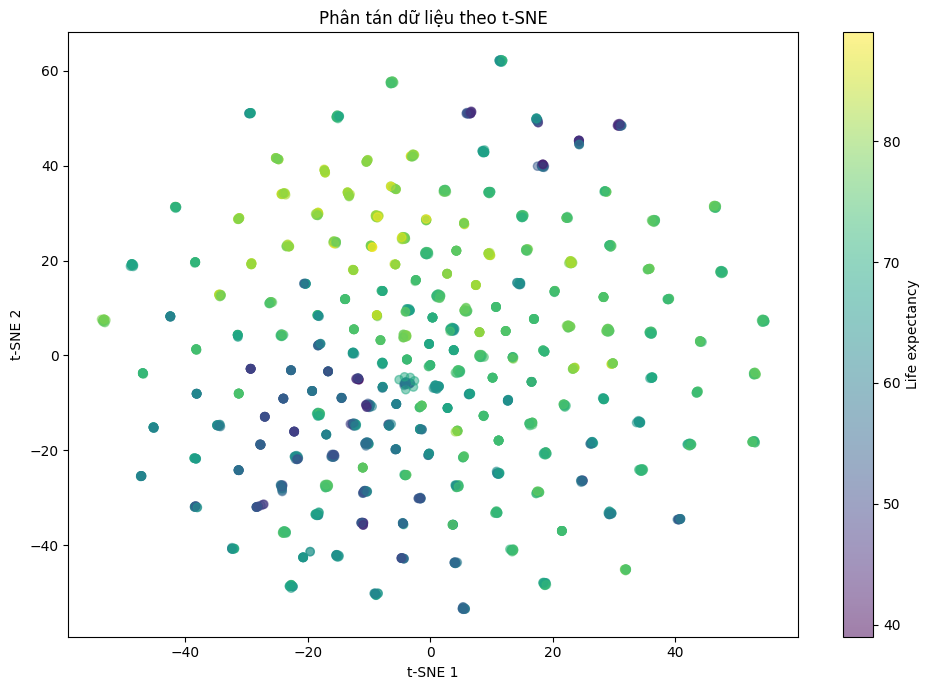

In [ ]:
# Trực quan hóa dữ liệu t-SNE
plt.figure(figsize=(10, 7))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.colorbar(label='Life expectancy')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Phân tán dữ liệu theo t-SNE')
plt.tight_layout()
plt.show()

## 4. So sánh và đánh giá

In [ ]:
# 4.1 Đánh giá phương sai giải thích trên tập kiểm tra
X_test_reconstructed_pca = np.dot(X_test_pca_95, pca_95.components_) + scaler.mean_
pca_variance_score = explained_variance_score(X_test_scaled, X_test_reconstructed_pca)

print("\nSo sánh PCA và t-SNE:")
print(f"Phương sai giải thích của PCA trên tập kiểm tra: {pca_variance_score:.4f}")
print(f"Số thành phần được sử dụng trong PCA: {n_components_95}")
print(f"Số thành phần được sử dụng trong t-SNE: 2 (cho visualize)")


So sánh PCA và t-SNE:
Phương sai giải thích của PCA trên tập kiểm tra: -37578836725383484246328101306368.0000
Số thành phần được sử dụng trong PCA: 182
Số thành phần được sử dụng trong t-SNE: 2 (cho visualize)


In [ ]:
np.save('../dimensionality-reduced-data/X_train_pca.npy', X_train_pca_95)
np.save('../dimensionality-reduced-data/X_test_pca.npy', X_test_pca_95)
np.save('../dimensionality-reduced-data/X_train_tsne.npy', X_train_tsne)
np.save('../dimensionality-reduced-data/X_test_tsne.npy', X_test_tsne)
np.save('../dimensionality-reduced-data/y_train.npy', y_train)
np.save('../dimensionality-reduced-data/y_test.npy', y_test)

## 5. Trực quan hóa các thành phần chính quan trọng

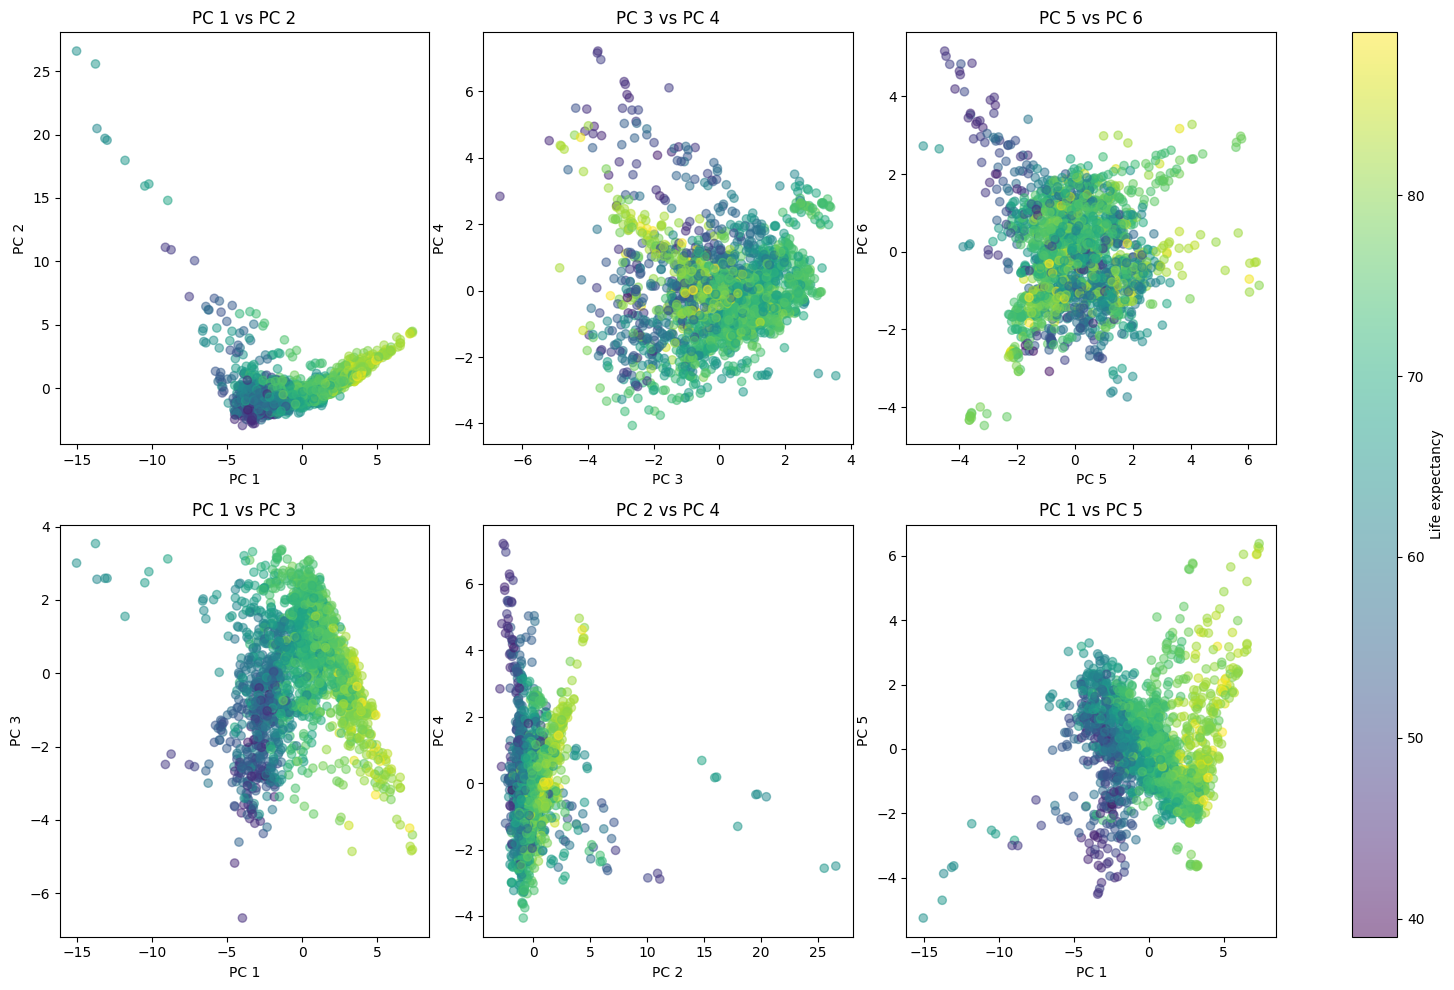

In [ ]:
# Trực quan hóa các thành phần chính quan trọng
if n_components_95 >= 6:
    # Vẽ biểu đồ phân tán cho 6 thành phần chính đầu tiên (cặp đôi)
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    axes = axes.flatten()

    pairs = [(0, 1), (2, 3), (4, 5), (0, 2), (1, 3), (0, 4)]

    for i, (pc1, pc2) in enumerate(pairs):
        scatter = axes[i].scatter(X_train_pca[:, pc1], X_train_pca[:, pc2], c=y_train, cmap='viridis', alpha=0.5)
        axes[i].set_xlabel(f'PC {pc1+1}')
        axes[i].set_ylabel(f'PC {pc2+1}')
        axes[i].set_title(f'PC {pc1+1} vs PC {pc2+1}')

    plt.tight_layout()
    plt.colorbar(scatter, ax=axes, label='Life expectancy')
    plt.savefig('../results/figures/pca_multiple_components.png')



Phân tích và giảm chiều dữ liệu đã hoàn thành!


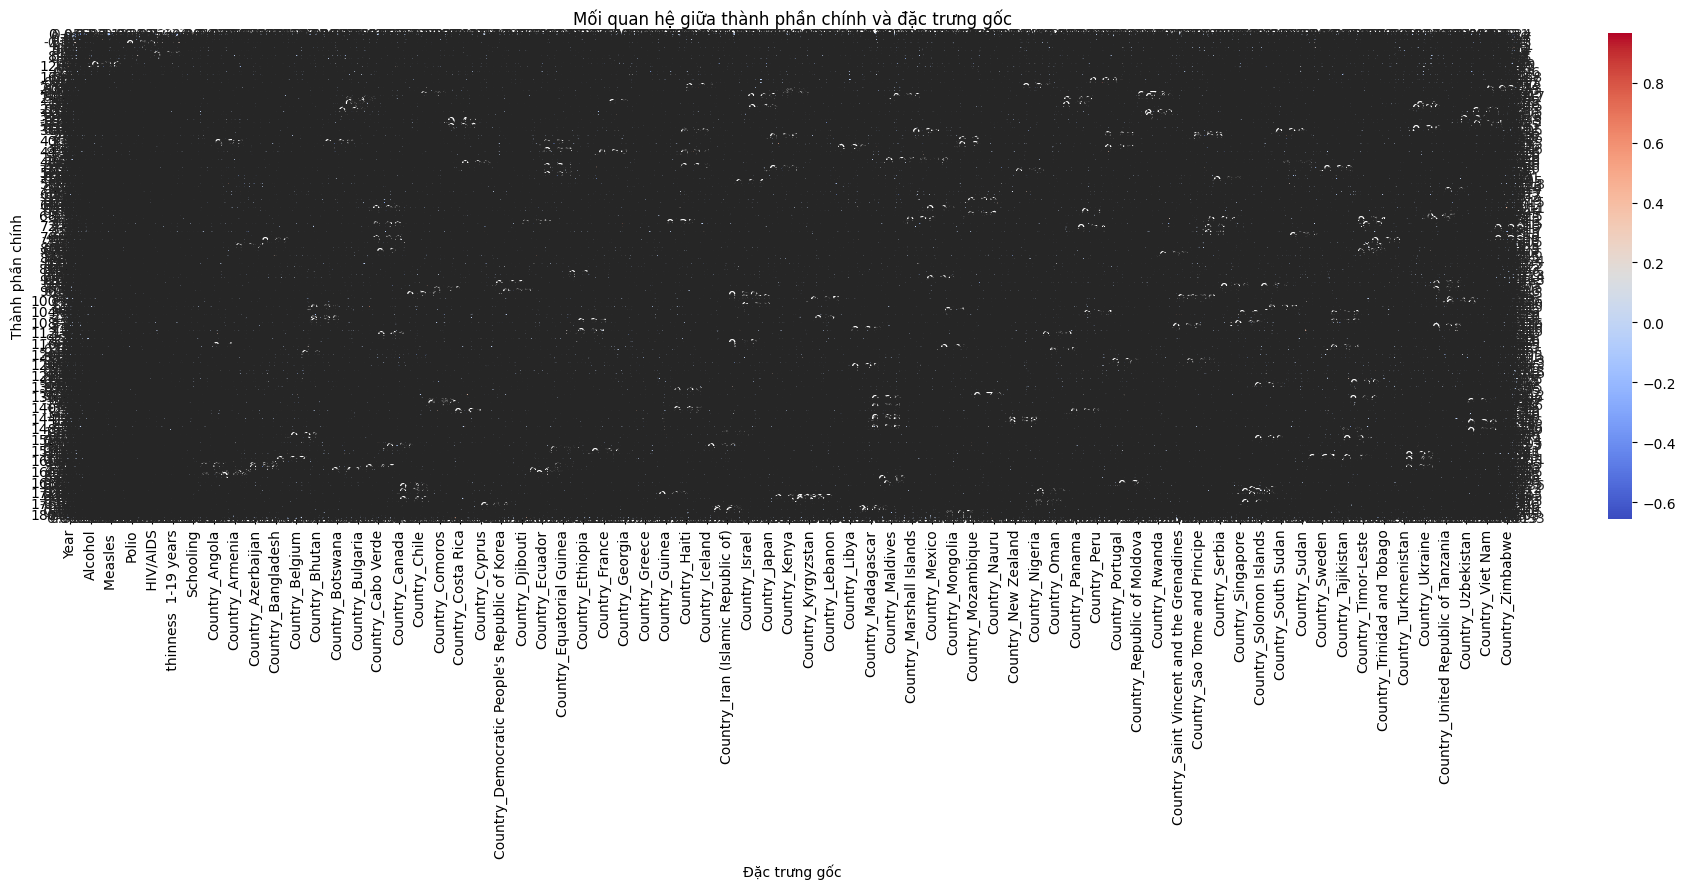

In [ ]:
# Phân tích mối quan hệ giữa các thành phần chính và các đặc trưng gốc
pca_components = pd.DataFrame(
    pca.components_,
    columns=X.columns
)

plt.figure(figsize=(19, 9))
sns.heatmap(pca_components.iloc[:n_components_95], annot=True, cmap='coolwarm')
plt.xlabel('Đặc trưng gốc')
plt.ylabel('Thành phần chính')
plt.title('Mối quan hệ giữa thành phần chính và đặc trưng gốc')
plt.tight_layout()
plt.savefig('../results/figures/pca_features_correlation.png')

print("\nPhân tích và giảm chiều dữ liệu đã hoàn thành!")

# PHẦN 3: Các mô hình phân loại nhị phân

## 1. K-nearest neighbors - KNN